## Understand Data

In [1]:
import os, os.path
from glob import glob
import numpy as np

import scipy.misc

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

In [3]:
DATA_DIR = 'data/train'

In [4]:
image_paths = glob(os.path.join(DATA_DIR, 'CameraRGB', '*.png'))
label_paths = glob(os.path.join(DATA_DIR, 'CameraSeg', '*.png'))

In [5]:
print("Total training images: ",len(image_paths))
print("Total training lables: ",len(label_paths))

Total training images:  1000
Total training lables:  1000


Train image shape:  (600, 800, 3)
Label image shape:  (600, 800, 3)


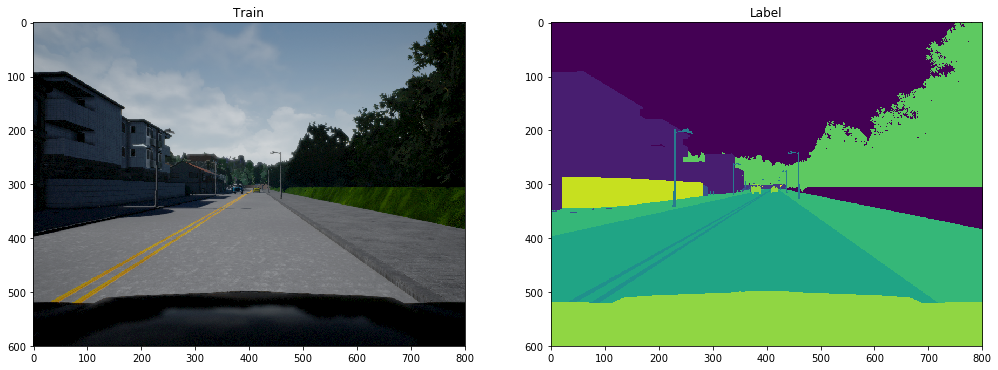

In [10]:
img_path = image_paths[0]
label_path = label_paths[0]
train_img = mpimg.imread(img_path)
label_img = mpimg.imread(label_path)

print("Train image shape: ", train_img.shape)
print("Label image shape: ", label_img.shape)

fig = plt.figure(figsize=(17,15))
plt.subplot(121)
plt.imshow(train_img)
plt.title('Train')
plt.subplot(122)
plt.imshow(label_img[:,:,0]) # Only channel 0- [RED] has classification info
plt.title('Label')

Train image shape:  (600, 800, 3)
Label image shape:  (600, 800, 3)


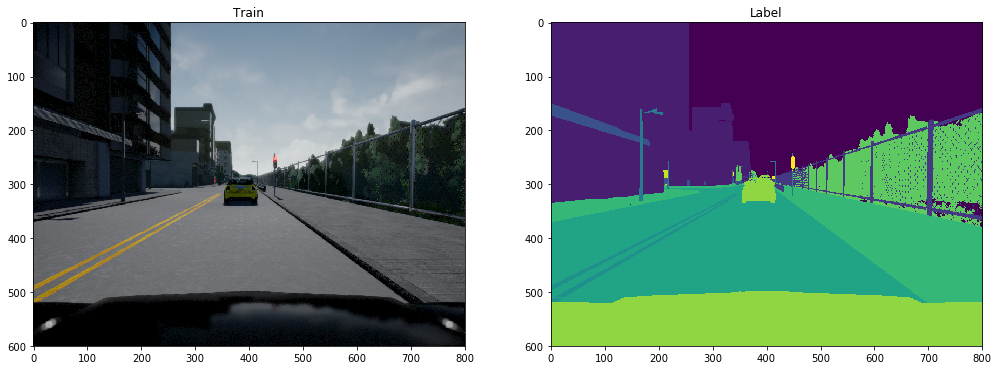

In [124]:
img_path = image_paths[100]
label_path = label_paths[100]
train_img = scipy.misc.imread(img_path)
label_img = scipy.misc.imread(label_path)

print("Train image shape: ", train_img.shape)
print("Label image shape: ", label_img.shape)

fig = plt.figure(figsize=(17,15))
plt.subplot(121)
plt.imshow(train_img)
plt.title('Train')
plt.subplot(122)
plt.imshow(label_img[:,:,0]) # Only channel 0- [RED] has classification info
plt.title('Label')

In [28]:
label_img[300:500,:,0]

array([[1, 1, 1, ..., 9, 9, 9],
       [1, 1, 1, ..., 9, 9, 9],
       [1, 1, 1, ..., 9, 9, 9],
       ..., 
       [7, 7, 7, ..., 8, 8, 8],
       [7, 7, 7, ..., 8, 8, 8],
       [7, 7, 7, ..., 8, 8, 8]], dtype=uint8)

In [125]:
# Vehicles - class 10
car_color = np.array([10, 0, 0])
# Roads - class 7
road_color = np.array([7, 0, 0])

In [139]:
# Convert image pixels, true if pixel value is equal to class1_color False otherwise.
gt1 = np.all(label_img == road_color, axis=2)
gt2 = np.all(label_img == car_color, axis=2)
gt3 = np.all((label_img != road_color) & (label_img != car_color), axis=2)
gt1 = gt1.reshape(*gt1.shape,1)
gt2 = gt2.reshape(*gt2.shape,1)
gt3 = gt3.reshape(*gt3.shape,1)
gt_label = np.concatenate((gt1, gt2, gt3), axis=2)
label_img.shape,gt_label.shape

((600, 800, 3), (600, 800, 3))

In [3]:
a= np.zeros((10,10,3), dtype=np.uint8)

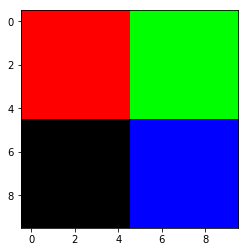

In [2]:
a= np.zeros((10,10,3), dtype=np.uint8)
a[0:5,0:5] =  [255,0,0]
a[0:5,5: ] =  [0,255,0]
a[5: ,5: ] =  [0,0,255]
a[5: ,0:5] =  [0,0,0]
plt.imshow(a)

In [102]:
# pick up a class, red
class1_color = np.array([255, 0, 0])
# Convert image pixels, true if pixel value is equal to class1_color False otherwise.
gt = np.all(a == class1_color, axis=2)
# change the shape 2D to 3D - one channel
gt = gt.reshape(*gt.shape,1)
# concatenate to generate 2 channels, yes/no
gt_img = np.concatenate((gt, np.invert(gt)), axis=2)
a.shape,gt_img.shape

((10, 10, 3), (10, 10, 2))

In [108]:
# pick up a class, red
class1_color = np.array([255, 0, 0])
# pick up a class, blue
class2_color = np.array([0, 0, 255])
# pick up a class, green
class3_color = np.array([0, 255, 0])
# Convert image pixels, true if pixel value is equal to class1_color False otherwise.
gt1 = np.all(a == class1_color, axis=2)
gt2 = np.all(a == class2_color, axis=2)
gt3 = np.all(a == class3_color, axis=2)
gt1 = gt1.reshape(*gt1.shape,1)
gt2 = gt2.reshape(*gt2.shape,1)
gt3 = gt3.reshape(*gt3.shape,1)
gt_label = np.concatenate((gt1, gt2, gt3), axis=2)
a.shape,gt_label.shape

((10, 10, 3), (10, 10, 3))

In [109]:
gt_label

array([[[ True, False, False],
        [ True, False, False],
        [ True, False, False],
        [ True, False, False],
        [ True, False, False],
        [False, False,  True],
        [False, False,  True],
        [False, False,  True],
        [False, False,  True],
        [False, False,  True]],

       [[ True, False, False],
        [ True, False, False],
        [ True, False, False],
        [ True, False, False],
        [ True, False, False],
        [False, False,  True],
        [False, False,  True],
        [False, False,  True],
        [False, False,  True],
        [False, False,  True]],

       [[ True, False, False],
        [ True, False, False],
        [ True, False, False],
        [ True, False, False],
        [ True, False, False],
        [False, False,  True],
        [False, False,  True],
        [False, False,  True],
        [False, False,  True],
        [False, False,  True]],

       [[ True, False, False],
        [ True, False, False],
  

In [4]:
a[0:5,0:5] = [1,0,0]
a[0:5,5: ] = [2,0,0]
a[5: ,5: ] = [3,0,0]
a[5: ,0:5] = [0,0,0]

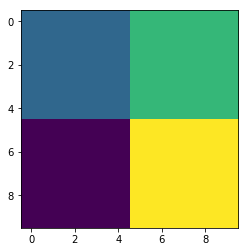

In [5]:
plt.imshow(a[:,:,0])

In [6]:
road_color = np.array([1, 0, 0])
car_color = np.array([2, 0, 0])

In [7]:
# Convert image pixels, true if pixel value is equal to class1_color False otherwise.
gt1 = np.all(a == road_color, axis=2)
gt2 = np.all(a == car_color, axis=2)
gt3 = np.all((a != road_color) & (a != car_color), axis=2)
gt1 = gt1.reshape(*gt1.shape,1)
gt2 = gt2.reshape(*gt2.shape,1)
gt3 = gt3.reshape(*gt3.shape,1)
gt_label = np.concatenate((gt1, gt2, gt3), axis=2)
a.shape,gt_label.shape

((10, 10, 3), (10, 10, 3))

In [8]:
gt_label

array([[[ True, False, False],
        [ True, False, False],
        [ True, False, False],
        [ True, False, False],
        [ True, False, False],
        [False,  True, False],
        [False,  True, False],
        [False,  True, False],
        [False,  True, False],
        [False,  True, False]],

       [[ True, False, False],
        [ True, False, False],
        [ True, False, False],
        [ True, False, False],
        [ True, False, False],
        [False,  True, False],
        [False,  True, False],
        [False,  True, False],
        [False,  True, False],
        [False,  True, False]],

       [[ True, False, False],
        [ True, False, False],
        [ True, False, False],
        [ True, False, False],
        [ True, False, False],
        [False,  True, False],
        [False,  True, False],
        [False,  True, False],
        [False,  True, False],
        [False,  True, False]],

       [[ True, False, False],
        [ True, False, False],
  

In [24]:
num_classes = 3 # car,road,other
# 4D 
tensor_4d_imgs   = np.array([a,a])
tensor_4d_labels = np.array([gt_label,gt_label])
# 4D to 2D
tensor_2d_imgs   = tensor_4d_imgs.reshape(-1,num_classes)
tensor_2d_labels = tensor_4d_labels.reshape(-1,num_classes)
tensor_2d_imgs.shape, tensor_2d_labels.shape

((200, 3), (200, 3))

## Output

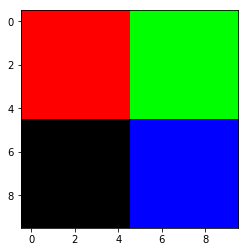

In [8]:
a= np.zeros((10,10,3), dtype=np.uint8)
a[0:5,0:5] =  [255,0,0]
a[0:5,5: ] =  [0,255,0]
a[5: ,5: ] =  [0,0,255]
a[5: ,0:5] =  [0,0,0]
plt.imshow(a)

In [15]:
b=np.array([a])
b.shape

(1, 10, 10, 3)

In [32]:
soft = a.reshape(-1,3)
soft[0][:,1]

IndexError: too many indices for array

In [26]:
b[0][:,1].reshape(5,6)

array([[255,   0,   0, 255,   0,   0],
       [255,   0,   0, 255,   0,   0],
       [255,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0]], dtype=uint8)

In [14]:
c[0]

array([255,   0,   0], dtype=uint8)